# Dimensionality reduction - Python - kernel PCA

In [1]:
import multiprocessing

num_cpu = multiprocessing.cpu_count()
num_cpu

16

In [2]:
import pandas as pd

dataset = pd.read_csv('data/social_network_ads.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15663161,Male,35,91000,1
1,15654456,Male,42,104000,1
2,15613014,Female,52,38000,1
3,15678201,Male,48,74000,1
4,15598070,Female,40,60000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
X[:5, :]

array([[    35,  91000],
       [    42, 104000],
       [    52,  38000],
       [    48,  74000],
       [    40,  60000]])

In [4]:
y = dataset.iloc[:, 4].values
y[:5]

array([1, 1, 1, 1, 0])

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA

# kernel rbf is gaussian kernel
kpca = KernelPCA(n_components = 2, kernel = 'rbf')

# visually, we will still expect a straight line but this line will better separate the dataset based on the two new extracted features

In [8]:
X_train = kpca.fit_transform(X_train)
X_train[:5, :]

array([[ 0.24577263, -0.22723063],
       [-0.55335733,  0.24749313],
       [ 0.32078329, -0.23855099],
       [ 0.33256053,  0.11057813],
       [ 0.42504589, -0.07756917]])

In [9]:
X_test = kpca.transform(X_test)
X_test[:5, :]

array([[ 0.4746146 , -0.27822763],
       [-0.5438618 , -0.32650609],
       [-0.24816438, -0.54614814],
       [-0.22742035,  0.6478199 ],
       [ 0.0043158 ,  0.47622032]])

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# supervised model so we provide the labels y_train
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[53,  7],
       [ 6, 34]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


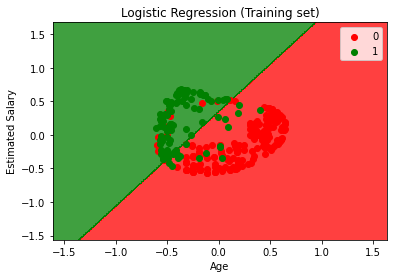

In [13]:
%matplotlib inline

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


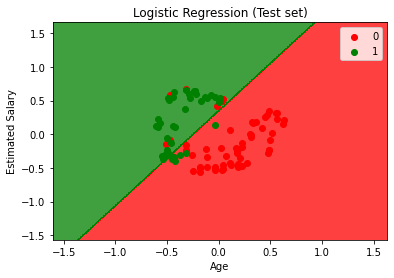

In [14]:
%matplotlib inline

# Visualising the Test set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()